<a href="https://colab.research.google.com/github/viffsi/Office_supply/blob/master/office_supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [730]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


staple import

In [0]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

EDA

**Column description**
1. Customer Number	 
A unique company identifier 
2. Campaign Period Sales 	 
Total dollar purchased during the campaign period 
3. Historical Sales Volume 	
Total historical dollar purchased
4. Date of First Purchase	
Date of first transaction
5. Number of Prior Year Transactions	
The number of transactions in the year prior to the promotion period
6. Do Not Direct Mail Solicit	
Does not allow promotional mail
7. Do Not Email	
Does not allow promotional email
8. Do Not Telemarket	
Does not allow promotional calls
9. Repurchase Method	
Method of last purchase prior to the campaign
10. Last Transaction Channel	
Sales channel of last purchase prior to the campaign
11. Desk	
Prior purchase of this item
12. Executive Chair	
Prior purchase of this item
13. Standard Chair	
Prior purchase of this item
14. Monitor	
Prior purchase of this item
15. Printer	
Prior purchase of this item
16. Computer	
Prior purchase of this item
17. Insurance	
Prior purchase of this item
18. Toner	
Prior purchase of this item
19. Office Supplies	
Prior purchase of this item
20. Number of Employees	
Purchased data on no. of employees
21. Language	
Primary language spoken

In [732]:
df_temp = pd.read_excel (r'/content/drive/My Drive/office supply/OfficeSupplyCampaignResultS7-23-19.xlsx', sheet_name='Campaign Results')
df_temp.head(3)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English


In [733]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16173 entries, 0 to 16172
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Customer Number                    16172 non-null  float64       
 1   Campaign Period Sales              16172 non-null  float64       
 2   Historical Sales Volume            16172 non-null  float64       
 3   Date of First Purchase             16172 non-null  datetime64[ns]
 4   Number of Prior Year Transactions  16172 non-null  float64       
 5   Do Not Direct Mail Solicit         16172 non-null  float64       
 6   Do Not Email                       16172 non-null  float64       
 7   Do Not Telemarket                  16172 non-null  float64       
 8   Repurchase Method                  16172 non-null  object        
 9   Last Transaction Channel           15730 non-null  object        
 10  Desk                              

refresh database

In [0]:
df = df_temp

check duplicate record

In [735]:
df.nunique()

Customer Number                      16172
Campaign Period Sales                 4322
Historical Sales Volume              16162
Date of First Purchase                3493
Number of Prior Year Transactions       61
Do Not Direct Mail Solicit               2
Do Not Email                             2
Do Not Telemarket                        2
Repurchase Method                        3
Last Transaction Channel                 8
Desk                                     4
Executive Chair                          2
Standard Chair                           2
Monitor                                  2
Printer                                  2
Computer                                 3
Insurance                                3
Toner                                    3
Office Supplies                          2
Number of Employees                      7
Language                                18
dtype: int64

Data cleaning & mapping

Does Campaign Period Sales consist only the transaction directly to the campaign or both this campaign transaction and normal transaction 

Should we take Campaign Period Sales where >0 as participate and =0 as not participate

Or get a mean of the dollar purchased based on Number of Prior Year Transactions, and then take Campaign Period Sales minus mean where >mean as participate and =mean as not participate



In [736]:
df['Campaign Period Sales'].describe()

count    16172.000000
mean       245.896967
std        720.317450
min       -566.500000
25%          0.000000
50%          0.000000
75%        145.669048
max       8936.850000
Name: Campaign Period Sales, dtype: float64

In [737]:
df.loc[df['Campaign Period Sales'] > 0, 'Campaign Period Sales'] = 1
df.loc[df['Campaign Period Sales'] == 0, 'Campaign Period Sales'] = 0
df['Campaign Period Sales'].value_counts()  

 0.000000      11787
 1.000000       4379
-140.960000        1
-161.166667        1
-566.500000        1
-119.333333        1
-421.833333        1
-14.320000         1
Name: Campaign Period Sales, dtype: int64

negative value indicate refund, will drop

In [738]:
df = df[df['Campaign Period Sales'] >= 0]
df['Campaign Period Sales'].value_counts()  

0.0    11787
1.0     4379
Name: Campaign Period Sales, dtype: int64

In [0]:
df = df.drop('Customer Number', axis = 1)

Create new column for account age


In [0]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
now = datetime.now()  

df['diff_years'] = ((now - df['Date of First Purchase'])/365).dt.days

In [741]:
df['diff_years'].describe()

count    16166.000000
mean        26.634418
std         10.958774
min          1.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         94.000000
Name: diff_years, dtype: float64

not much of a recent buyer identified

In [742]:
df['diff_years'].value_counts(bins=10)

(19.6, 28.9]     6898
(28.9, 38.2]     4203
(0.906, 10.3]    1545
(10.3, 19.6]     1489
(38.2, 47.5]     1397
(47.5, 56.8]      500
(56.8, 66.1]      119
(66.1, 75.4]       14
(84.7, 94.0]        1
(75.4, 84.7]        0
Name: diff_years, dtype: int64

Create new column for sales volume per year

Has very low correlation to label, will drop

In [0]:
#df['salesVolumePerYear'] = df['Historical Sales Volume'] / df['diff_years'] 
#df['salesVolumePerYear'].describe()

Create new column for sales order per year

Has very low correlation to label, will drop

In [0]:
#df['salesOrderPerYear'] = df['Number of Prior Year Transactions'] / df['diff_years'] 
#df['salesOrderPerYear'].describe()

In [745]:
df['Do Not Direct Mail Solicit'].value_counts()

0.0    14425
1.0     1741
Name: Do Not Direct Mail Solicit, dtype: int64

In [746]:
df['Do Not Email'].value_counts()    

0.0    12745
1.0     3421
Name: Do Not Email, dtype: int64

In [747]:
df['Do Not Telemarket'].value_counts()

0.0    14590
1.0     1576
Name: Do Not Telemarket, dtype: int64

In [748]:
df['Repurchase Method'].value_counts()

NOTICE          11897
AUTO RENEW       4268
PAYMENT PLAN        1
Name: Repurchase Method, dtype: int64

In [749]:
df['Last Transaction Channel'].value_counts()

MAIL              7766
AUTO RENEW        3141
WEB               2645
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: Last Transaction Channel, dtype: int64

In [750]:
df['Last Transaction Channel'].isnull().sum()

442

In [0]:
df = df[df['Last Transaction Channel'].notna()]

In [752]:
df['Desk'].value_counts()

N     14837
Y       886
YY        1
Name: Desk, dtype: int64

There is a problem with Desk column, 1 extra line and 1 incorrect value

Find out the location of this adnormal to decide next action

Incorrect value will map later

In [753]:
print(df[df['Desk']==911].index.values)

[]


In [754]:
df.tail(3)

,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,diff_years
16169,0.0,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN,25
16170,0.0,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN,24
16171,0.0,1.949425e+06,1998-03-15,4.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,N,,NaN,22


In [755]:
df = df[df.Desk != 911]
df.tail(3)

,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,diff_years
16169,0.0,2.355030e+06,1995-01-01,6.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN,25
16170,0.0,5.845700e+05,1996-02-01,2.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN,24
16171,0.0,1.949425e+06,1998-03-15,4.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,N,,NaN,22


In [756]:
df['Desk'].value_counts()

N     14837
Y       886
YY        1
Name: Desk, dtype: int64

In [0]:
df['Desk'] = df['Desk'].map( {'N': 0, 'Y': 1, 'YY': 1} )

In [758]:
df['Desk'].value_counts()

0    14837
1      887
Name: Desk, dtype: int64

In [759]:
df['Executive Chair'].value_counts()

N    14592
Y     1131
Name: Executive Chair, dtype: int64

In [0]:
df['Executive Chair'] = df['Executive Chair'].map( {'N': 0, 'Y': 1} )
df['Executive Chair'].replace('', np.nan, inplace=True)
#df.dropna(subset=['Executive Chair'], inplace=True)

In [761]:
df['Executive Chair'].value_counts()

0.0    14592
1.0     1131
Name: Executive Chair, dtype: int64

In [762]:
df['Standard Chair'].value_counts()


N    15452
Y      271
Name: Standard Chair, dtype: int64

In [763]:
df['Standard Chair'] = df['Standard Chair'].map( {'N': 0, 'Y': 1} )

df['Standard Chair'].value_counts()

0.0    15452
1.0      271
Name: Standard Chair, dtype: int64

In [764]:
df['Monitor'].value_counts()

N    15431
Y      292
Name: Monitor, dtype: int64

In [765]:
df['Monitor'] = df['Monitor'].map( {'N': 0, 'Y': 1} )
df['Monitor'].value_counts()

0.0    15431
1.0      292
Name: Monitor, dtype: int64

In [766]:
df['Printer'].value_counts()

N    15305
Y      418
Name: Printer, dtype: int64

In [767]:
df['Printer'] = df['Printer'].map( {'N': 0, 'Y': 1} )
df['Printer'].value_counts()

0.0    15305
1.0      418
Name: Printer, dtype: int64

In [768]:
df['Computer'].value_counts()


N     15498
Y       225
YY        1
Name: Computer, dtype: int64

In [769]:
df['Computer'] = df['Computer'].map( {'N': 0, 'Y': 1,'YY': 1} )
df['Computer'].value_counts()

0    15498
1      226
Name: Computer, dtype: int64

In [770]:
df['Insurance'].value_counts()


N     13845
Y      1876
YY        1
Name: Insurance, dtype: int64

In [771]:
df['Insurance'] = df['Insurance'].map( {'N': 0, 'Y': 1,'YY': 1} )
df['Insurance'].replace('', np.nan, inplace=True)
df.dropna(subset=['Insurance'], inplace=True)
df['Insurance'].value_counts()

0.0    13845
1.0     1877
Name: Insurance, dtype: int64

In [772]:
df['Toner'].value_counts()


N     14683
Y      1038
YY        1
Name: Toner, dtype: int64

In [773]:
df['Toner'] = df['Toner'].map( {'N': 0, 'Y': 1,'YY': 1} )
df['Toner'].value_counts()

0    14683
1     1039
Name: Toner, dtype: int64

In [774]:
df['Office Supplies'].value_counts()

Y    11514
N     4208
Name: Office Supplies, dtype: int64

In [775]:
df['Office Supplies'] = df['Office Supplies'].map( {'N': 0, 'Y': 1,'YY': 1} )
df['Office Supplies'].value_counts()

1    11514
0     4208
Name: Office Supplies, dtype: int64

In [776]:
df['Number of Employees'].value_counts()

6-10       5103
           3604
1-5        2637
11-50      2170
51-100     1349
101-500     639
500+        218
Name: Number of Employees, dtype: int64

blank value on numbers of employee. quantity are significant enough to not drop

In [777]:
df['Number of Employees_copy'] = df['Number of Employees']
df['Number of Employees_copy'] = df['Number of Employees_copy'].replace(r'^\s*$', np.NaN, regex=True)
df['Number of Employees_copy'] = df['Number of Employees_copy'].astype(str)
df['Number of Employees_copy'] = df['Number of Employees_copy'].map({'1-5': 0, '6-10': 1, '11-50': 2, '51-100': 3, '101-500': 4, '500+': 5, 'nan': 6})
df['Number of Employees_copy'].value_counts()

1    5103
6    3606
0    2637
2    2170
3    1349
4     639
5     218
Name: Number of Employees_copy, dtype: int64

In [778]:
df['Number of Employees_copy']=df['Number of Employees_copy'].replace(6, df['Number of Employees_copy'].mean(), regex=True)
df['Number of Employees_copy'].value_counts()

1.000000    5103
2.466098    3606
0.000000    2637
2.000000    2170
3.000000    1349
4.000000     639
5.000000     218
Name: Number of Employees_copy, dtype: int64

In [0]:
df = df.drop('Number of Employees_copy', axis = 1)

category mean suggest the blanks should be in between of category 11-50 and category 51-100

will merge these 3 category together

In [0]:
#df['Number of Employees'] = df['Number of Employees'].map({'11-50': 11-100, '51-100': 11-100, r'^\s*$': 11-100})
df['Number of Employees'] = df['Number of Employees'].replace(r'^\s*$', np.nan, regex=True)
df['Number of Employees'] = df['Number of Employees'].astype(str)
df['Number of Employees'] = df['Number of Employees'].replace("11-50","11-100").replace("51-100","11-100").replace("nan","11-100")

In [781]:
df['Number of Employees'].value_counts()

11-100     7125
6-10       5103
1-5        2637
101-500     639
500+        218
Name: Number of Employees, dtype: int64

In [782]:
df['Language'].value_counts()

English       11037
Spanish          88
Italian          45
Portuguese       40
Hindi            39
Chinese          30
Russian          24
Hebrew           20
Arabic           16
German           15
Greek            14
Japanese         11
Polish           10
Vietnamese        9
French            6
Korean            4
Thai              2
Pashto            1
Name: Language, dtype: int64

group all the non english together and group nan into english

In [0]:

List=df.Language.value_counts().index[1:].tolist()
mapping={}
for s in List:
    mapping[s]='Else'
df['Language']=df['Language'].map(lambda x: mapping[x] if x in mapping else x)
df['Language'] = df['Language'].map( {'English': 1,'Else': 0} )
df.Language.value_counts()
df.rename(columns={'Language': 'isEnglish'}, inplace=True)
df['isEnglish'] = df['isEnglish'].replace(np.nan,1 , regex=True)

In [784]:
df['isEnglish'].value_counts()

1.0    15348
0.0      374
Name: isEnglish, dtype: int64

In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15722 entries, 0 to 16171
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Campaign Period Sales              15722 non-null  float64       
 1   Historical Sales Volume            15722 non-null  float64       
 2   Date of First Purchase             15722 non-null  datetime64[ns]
 3   Number of Prior Year Transactions  15722 non-null  float64       
 4   Do Not Direct Mail Solicit         15722 non-null  float64       
 5   Do Not Email                       15722 non-null  float64       
 6   Do Not Telemarket                  15722 non-null  float64       
 7   Repurchase Method                  15722 non-null  object        
 8   Last Transaction Channel           15722 non-null  object        
 9   Desk                               15722 non-null  int64         
 10  Executive Chair                   

In [0]:
for col in ['Campaign Period Sales', 'Number of Prior Year Transactions', 'Do Not Direct Mail Solicit', 'Do Not Email', 'Do Not Telemarket', 'Executive Chair', 'Insurance', 'isEnglish']:
    df[col] = df[col].astype('int')

In [787]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15722 entries, 0 to 16171
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Campaign Period Sales              15722 non-null  int64         
 1   Historical Sales Volume            15722 non-null  float64       
 2   Date of First Purchase             15722 non-null  datetime64[ns]
 3   Number of Prior Year Transactions  15722 non-null  int64         
 4   Do Not Direct Mail Solicit         15722 non-null  int64         
 5   Do Not Email                       15722 non-null  int64         
 6   Do Not Telemarket                  15722 non-null  int64         
 7   Repurchase Method                  15722 non-null  object        
 8   Last Transaction Channel           15722 non-null  object        
 9   Desk                               15722 non-null  int64         
 10  Executive Chair                   

heatmap

In [0]:
df['Number of Employees_heatmap'] = df['Number of Employees']
df['Number of Employees_heatmap'] = df['Number of Employees_heatmap'].map({'1-5': 0, '6-10': 1, '11-100': 2, '101-500': 3, '500+': 4})

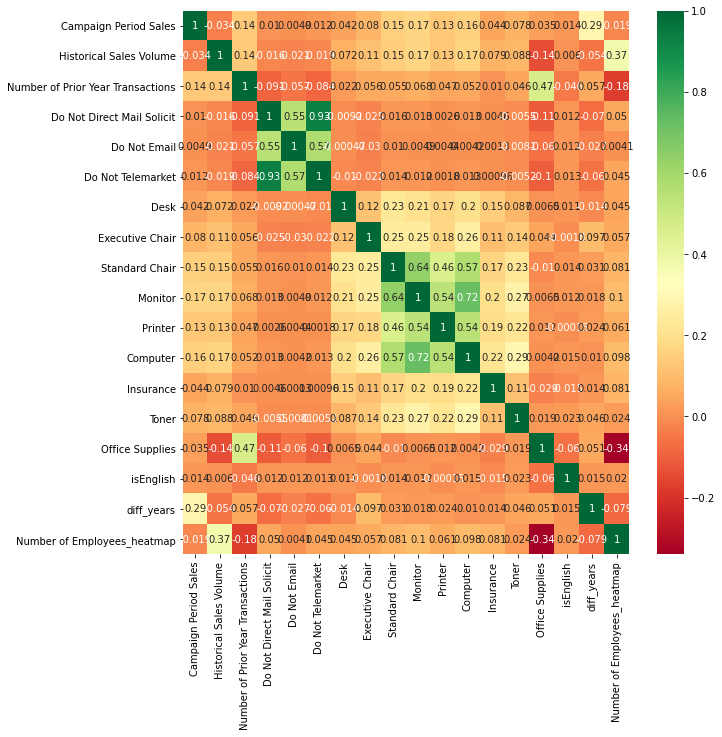

In [789]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [790]:
df_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Campaign Period Sales']

,Feature 1,Feature 2,Correlation Coefficient
17,Campaign Period Sales,Campaign Period Sales,1.000000
43,Campaign Period Sales,diff_years,0.285407
75,Campaign Period Sales,Monitor,0.170015
80,Campaign Period Sales,Computer,0.155554
83,Campaign Period Sales,Standard Chair,0.154078
91,Campaign Period Sales,Number of Prior Year Transactions,0.138927
94,Campaign Period Sales,Printer,0.132670
121,Campaign Period Sales,Executive Chair,0.079881
124,Campaign Period Sales,Toner,0.078490
156,Campaign Period Sales,Insurance,0.043865


In [0]:
df = df.drop('Number of Employees_heatmap', axis = 1)

most of the feature didnt show much correlation to the label

will use all of them to do modelling

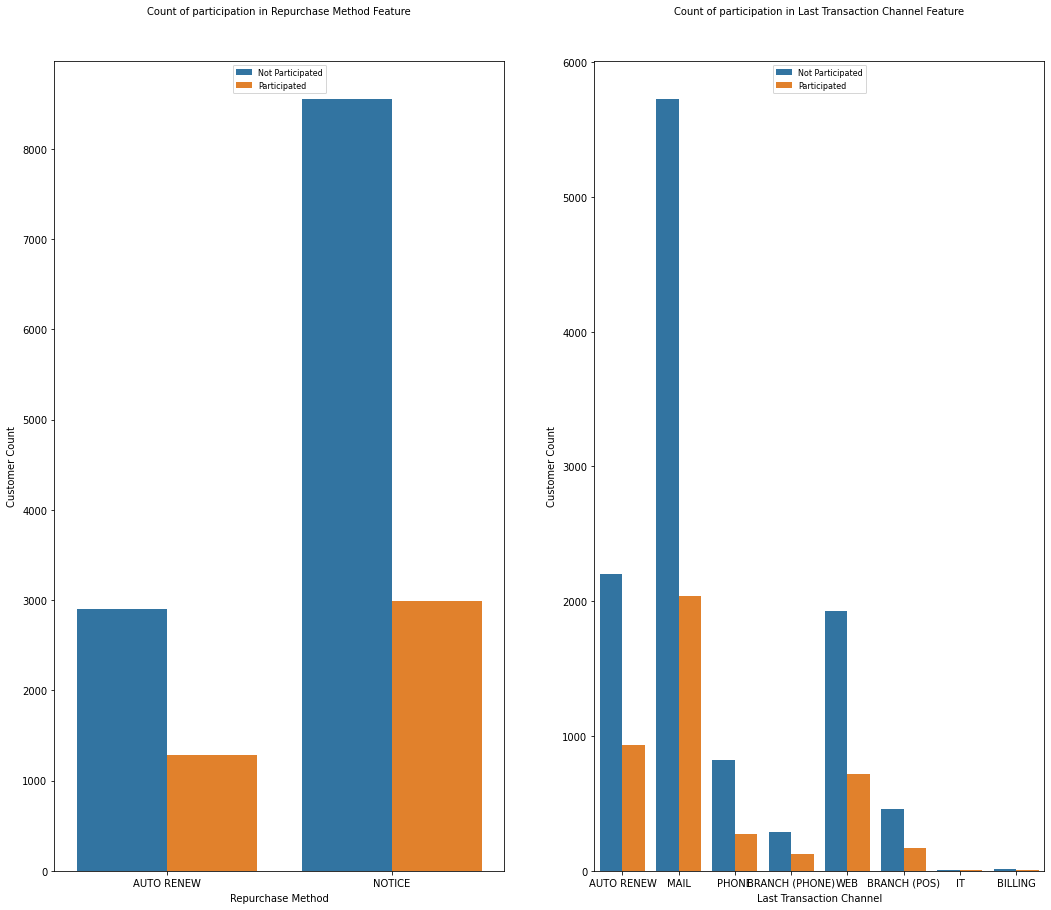

In [792]:
cat_features = ['Repurchase Method', 'Last Transaction Channel']

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 10))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, hue='Campaign Period Sales', data=df)
    
    plt.xlabel('{}'.format(feature), size=10, labelpad=5)
    plt.ylabel('Customer Count', size=10, labelpad=5)    
    plt.tick_params(axis='x', labelsize=10)
    plt.tick_params(axis='y', labelsize=10)
    
    plt.legend(['Not Participated', 'Participated'], loc='upper center', prop={'size': 8})
    plt.title('Count of participation in {} Feature'.format(feature), size=10, y=1.05)

plt.show()

In [793]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df.drop(columns=['Date of First Purchase', 'Historical Sales Volume'], inplace=True)
df_encode = pd.get_dummies(df, prefix_sep='_', drop_first=True)


X = np.array(df_encode.drop(columns='Campaign Period Sales'))
Y = np.array(df_encode['Campaign Period Sales'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

lr = LogisticRegression()
lr.fit(X_train, Y_train)
print("Logisticregression = " ,lr.score(X_test, Y_test))



Logisticregression =  0.7828298887122417


base line is 0.73

how can we get better than that?

1. merging the pervious purchased to 1 column.(doesnt show much correlation, drop)
2. does sales volume per year and number of tranx per year affect campaign?(doesnt show much correlation, drop)
3. recent buy parts of office supplies?(account active >1 year, unable to segregate recent buyer)
4. computer set buyers has the dendency to look for discount? [computer, monitor, printer, standard chair](shows some correlation, keep)

merging the pervious purchased to 1 column



In [0]:
def label_purchased (row):
   if row['Monitor'] + row['Computer'] + row['Standard Chair'] + row['Printer'] + row['Insurance'] + row['Desk'] + row['Office Supplies'] > 0 :
      return 1
   return 0

#df['hasPriorPurchased_label'] = df.apply (lambda row: label_purchased(row), axis=1)

Check if purchased whole basic computer set, mon+comp+chair+printer

In [0]:
def label_purchased (row):
   if row['Monitor'] + row['Computer'] + row['Standard Chair'] + row['Printer']  > 0 :
      return 1
   return 0

df['BasicComputerBuyer'] = df.apply (lambda row: label_purchased(row), axis=1)

how much of a basic set acquired?

In [0]:
df['OwnedBasicSet'] = df['Monitor'] + df['Computer'] + df['Standard Chair'] + df['Printer']
df['OwnedBasicSet'] = df['OwnedBasicSet'].astype('int')

In [797]:
df.head(3)

,Campaign Period Sales,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,isEnglish,diff_years,BasicComputerBuyer,OwnedBasicSet
0,1,15,0,0,0,AUTO RENEW,AUTO RENEW,0,0,0.0,0.0,0.0,0,1,0,1,6-10,1,51,0,0
1,1,22,0,0,0,NOTICE,MAIL,0,0,0.0,0.0,0.0,0,0,0,1,11-100,1,38,0,0
2,1,19,0,0,0,NOTICE,MAIL,0,0,0.0,0.0,0.0,0,0,0,1,6-10,1,57,0,0


In [798]:
df.drop(['Standard Chair', 'Monitor', 'Printer', 'Computer', 'Insurance',  'Office Supplies', 'Desk','Number of Employees','Do Not Telemarket','Do Not Direct Mail Solicit','Do Not Email','Last Transaction Channel','isEnglish','Repurchase Method'], axis=1, inplace=True)
df.head(3)

,Campaign Period Sales,Number of Prior Year Transactions,Executive Chair,Toner,diff_years,BasicComputerBuyer,OwnedBasicSet
0,1,15,0,0,51,0,0
1,1,22,0,0,38,0,0
2,1,19,0,0,57,0,0


In [0]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
#df.drop(columns=['Date of First Purchase', 'Historical Sales Volume'], inplace=True)
df_encode = pd.get_dummies(df, prefix_sep='_', drop_first=True)


X = np.array(df_encode.drop(columns='Campaign Period Sales'))
Y = np.array(df_encode['Campaign Period Sales'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [0]:
model_param = {
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'param':{
            'criterion': ['gini','entropy']
        }
    },
        'KNeighborsClassifier':{
        'model':KNeighborsClassifier(),
        'param':{
            'n_neighbors': [5,10,15,20,25]
        }
    },
        'SVC':{
        'model':SVC(),
        'param':{
            'kernel':['rbf','linear','sigmoid'],
            'C': [0.1, 1, 10, 100]
         
        }
    }
}

In [802]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X_train,Y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

KeyboardInterrupt: ignored

In [0]:
df_model_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model_score

In [0]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

#lr = LogisticRegression()
#lr.fit(X_train, Y_train)
#print("LogisticRegression: %.2f%%" % (lr.score(X_test, Y_test)*100.0))


kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("LogisticRegression: %.2f%%" % (results_kfold.mean()*100.0))

In [0]:
corrmat = df_encode.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_encode[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
df_corr = df_encode.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Campaign Period Sales']